In [160]:
import nltk
import re
with open("..\\gather_data\\text.txt") as f:
    data = f.read()
    
print data

It would be hard to forgive The Emoji Movie its "meh" plotline and the fact that it is literally one giant ad for apps, but its most unforgivable sin is that it perpetuates the notion that emojis are childish. Totally bullshit. Pleasant film.


In [161]:
print type(data)
doc_words = re.sub(r'[".,!?()@#$%^&*{}]', '', data)
doc_words
print doc_words
with open("..\\gather_data\\text_temp.txt", "w") as f:
    f.write(doc_words)

<type 'str'>
It would be hard to forgive The Emoji Movie its meh plotline and the fact that it is literally one giant ad for apps but its most unforgivable sin is that it perpetuates the notion that emojis are childish Totally bullshit Pleasant film


In [162]:
with open("..\\gather_data\\text_temp.txt") as f:
    dat = f.read()
doc_words = nltk.word_tokenize(dat)
print doc_words

['It', 'would', 'be', 'hard', 'to', 'forgive', 'The', 'Emoji', 'Movie', 'its', 'meh', 'plotline', 'and', 'the', 'fact', 'that', 'it', 'is', 'literally', 'one', 'giant', 'ad', 'for', 'apps', 'but', 'its', 'most', 'unforgivable', 'sin', 'is', 'that', 'it', 'perpetuates', 'the', 'notion', 'that', 'emojis', 'are', 'childish', 'Totally', 'bullshit', 'Pleasant', 'film']


In [163]:
def stemmer(doc_words):
    doc_words = [w.lower() for w in doc_words]
    stemmer_ = nltk.PorterStemmer()
    stemmed_words = [stemmer_.stem(k.lower()) for k in doc_words] 
    return stemmed_words
    
words = stemmer(doc_words)
print words

['it', 'would', 'be', 'hard', 'to', u'forgiv', 'the', 'emoji', u'movi', u'it', 'meh', u'plotlin', 'and', 'the', 'fact', 'that', 'it', 'is', u'liter', 'one', 'giant', 'ad', 'for', u'app', 'but', u'it', 'most', u'unforgiv', 'sin', 'is', 'that', 'it', u'perpetu', 'the', 'notion', 'that', u'emoji', 'are', 'childish', u'total', 'bullshit', 'pleasant', 'film']


In [164]:
from nltk.corpus import stopwords

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    filtered_words = list(filter(lambda x: x not in stop_words, text))
    return filtered_words

clean_words = remove_stop_words(words)
print clean_words

['would', 'hard', u'forgiv', 'emoji', u'movi', 'meh', u'plotlin', 'fact', u'liter', 'one', 'giant', 'ad', u'app', u'unforgiv', 'sin', u'perpetu', 'notion', u'emoji', 'childish', u'total', 'bullshit', 'pleasant', 'film']


In [165]:
import collections
c = collections.Counter(clean_words)
print c

Counter({'emoji': 2, u'unforgiv': 1, 'ad': 1, u'movi': 1, u'app': 1, 'hard': 1, 'one': 1, u'total': 1, 'film': 1, 'giant': 1, u'forgiv': 1, 'would': 1, 'childish': 1, u'perpetu': 1, 'sin': 1, u'liter': 1, u'plotlin': 1, 'meh': 1, 'pleasant': 1, 'bullshit': 1, 'notion': 1, 'fact': 1})


In [166]:
print c.most_common(5)

[('emoji', 2), (u'unforgiv', 1), ('ad', 1), (u'movi', 1), (u'app', 1)]


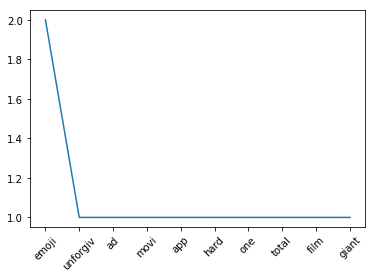

In [167]:
# input - collection counter
def plot_most_common(collection, n):
    most = collection.most_common(n)
    s, y = zip(*most)
    x = np.arange(len(s))
    pl.xticks(x, s)
    pl.xticks(range(len(s)), s, rotation=45)
    pl.plot(x, y)
    pl.show()

plot_most_common(c, 10)

In [168]:
common = c.most_common(min(len(clean_words), 10000))
most_common = common[ : 15]
indices = np.arange(len(most_common))
fig = plt.figure()
freq = [k[1] for k in most_common]
word = [str(k[0]) for k in most_common]
plt.bar(indices, freq, color='blue')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
fig.savefig('..//semantic_output//common_words.jpg')

[('emoji', 2), (u'unforgiv', 1), ('ad', 1), (u'movi', 1), (u'app', 1), ('hard', 1), ('one', 1), (u'total', 1), ('film', 1), ('giant', 1), (u'forgiv', 1), ('would', 1), ('childish', 1), (u'perpetu', 1), ('sin', 1), (u'liter', 1), (u'plotlin', 1), ('meh', 1), ('pleasant', 1), ('bullshit', 1), ('notion', 1), ('fact', 1)]


In [169]:
positive_words = []
with open(".\\\opinion-lexicon-English\\positive-words.txt") as f:
    positive_words = f.read()
    positive_words = positive_words.split("\n")

    
negative_words = []
with open(".\\\opinion-lexicon-English\\negative-words.txt") as f:
    negative_words = f.read()
    negative_words = negative_words.split("\n")

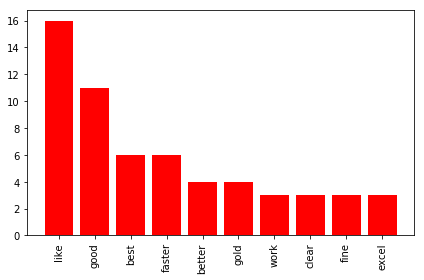

[('depress', 3), ('difficult', 3), ('poor', 3), ('lack', 2), ('miss', 2), ('rival', 2), ('slow', 2), ('lose', 2), ('dead', 2), ('problem', 2)]


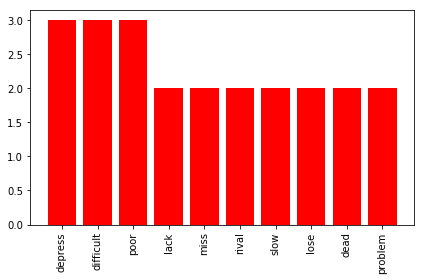

93 50
True


In [198]:
neg_count = 0
pos_count = 0
pos_words = []
neg_words = []

for word in common:
    if str(word[0]) in positive_words:
        pos_count += word[1]
        if len(pos_words) < 10:
            pos_words.append((str(word[0]), word[1]))
    if str(word[0]) in negative_words:
        neg_count += word[1]
        if len(neg_words) < 10:
            neg_words.append((str(word[0]), word[1]))
    
freq_pos = []
word_pos = []
for k in pos_words:
    freq_pos.append(k[1])
    word_pos.append(k[0])
indices_pos = np.arange(len(pos_words))
fig = plt.figure()
plt.bar(indices_pos, freq_pos, color='blue')
plt.xticks(indices_pos, word_pos, rotation='vertical')
plt.tight_layout()
fig.savefig('..//semantic_output//good_words.jpg')
# plt.show()


freq_neg = []
word_neg = []
print neg_words
for k in neg_words:
    freq_neg.append(k[1])
    word_neg.append(k[0])
indices_neg = np.arange(len(neg_words))
fig = plt.figure()
plt.bar(indices_neg, freq_neg, color='r')
plt.xticks(indices_neg, word_neg, rotation='vertical')
plt.tight_layout()
fig.savefig('..//semantic_output//bad_words.jpg')
# plt.show()

print pos_count, neg_count
print "pleasant" in positive_words

[('depress', 3), ('difficult', 3), ('poor', 3), ('lack', 2), ('miss', 2), ('rival', 2), ('slow', 2), ('lose', 2), ('dead', 2), ('problem', 2), ('twist', 2), ('scratch', 1), ('hate', 1), ('disturb', 1), ('louder', 1)]


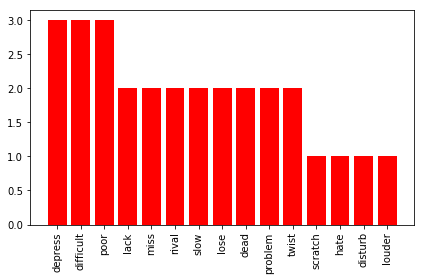

In [197]:
freq_neg = []
word_neg = []
print neg_words
for k in neg_words:
    freq_neg.append(k[1])
    word_neg.append(k[0])
indices_neg = np.arange(len(neg_words))
plt.bar(indices_neg, freq_neg, color='r')
plt.xticks(indices_neg, word_neg, rotation='vertical')
plt.tight_layout()
plt.show()

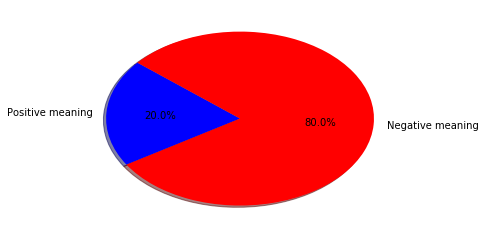

In [173]:
colors = ['blue', 'red']
labels = ["Positive meaning", "Negative meaning"]
fig = plt.figure()
plt.pie([pos_count, neg_count],  labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()
fig.savefig('..//semantic_output//piechart.png')

In [207]:
import nltk
import re
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from nltk.corpus import stopwords
import collections

def stemmer(doc_words):
    doc_words = [w.lower() for w in doc_words]
    stemmer_ = nltk.PorterStemmer()
    stemmed_words = [stemmer_.stem(k.lower()) for k in doc_words] 
    return stemmed_words

def remove_stop_words(text):
    bad_words = ["like", "follow", "http", "https", "click", "-tag"]
    stop_words = list(set(stopwords.words('english')))
    for k in bad_words:
        stop_words.append(k)
    stop_words = set(stop_words)
    filtered_words = list(filter(lambda x: x not in stop_words, text))
    return filtered_words

with open("..\\gather_data\\python_filtered.json") as f:
    data = f.read()
data = data.decode('ascii', 'ignore')
doc_words = re.sub(r'[".,!?()@#$%^&*{}]', '', data)
with open("..\\gather_data\\text_temp.txt", "w") as f:
    f.write(doc_words)    
with open("..\\gather_data\\text_temp.txt") as f:
    dat = f.read()
    
doc_words = nltk.word_tokenize(dat)
words = stemmer(doc_words)
clean_words = remove_stop_words(words)    
collection = collections.Counter(clean_words)
common = collection.most_common(min(len(clean_words), 10000))
most_common = common[ : 15]
indices = np.arange(len(most_common))
fig = plt.figure()
freq = [k[1] for k in most_common]
word = [str(k[0]) for k in most_common]
plt.bar(indices, freq, color='green')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
# fig.savefig('..//semantic_output//common_words.jpg')
fig.savefig('..//trash//common_words' + str(np.random.randint(100)) + '.jpg')

positive_words = []
with open(".\\\opinion-lexicon-English\\positive-words.txt") as f:
    positive_words = f.read()
    positive_words = positive_words.split("\n")
    
negative_words = []
with open(".\\\opinion-lexicon-English\\negative-words.txt") as f:
    negative_words = f.read()
    negative_words = negative_words.split("\n")
    
neg_count = 0
pos_count = 0
pos_words = []
neg_words = []

for word in common:
    if str(word[0]) in positive_words:
        pos_count += word[1]
        if len(pos_words) < 10:
            pos_words.append((str(word[0]), word[1]))
    if str(word[0]) in negative_words:
        neg_count += word[1]
        if len(neg_words) < 10:
            neg_words.append((str(word[0]), word[1]))
    
freq_pos = []
word_pos = []
for k in pos_words:
    freq_pos.append(k[1])
    word_pos.append(k[0])
indices_pos = np.arange(len(pos_words))
fig = plt.figure()
plt.bar(indices_pos, freq_pos, color='blue')
plt.xticks(indices_pos, word_pos, rotation='vertical')
plt.tight_layout()
# fig.savefig('..//semantic_output//good_words.jpg')
fig.savefig('..//trash//good_words' + str(np.random.randint(100)) + '.jpg')

freq_neg = []
word_neg = []

for k in neg_words:
    freq_neg.append(k[1])
    word_neg.append(k[0])
indices_neg = np.arange(len(neg_words))
fig = plt.figure()
plt.bar(indices_neg, freq_neg, color='r')
plt.xticks(indices_neg, word_neg, rotation='vertical')
plt.tight_layout()
# fig.savefig('..//semantic_output//bad_words.jpg')
fig.savefig('..//trash//bad_words' + str(np.random.randint(100)) + '.jpg')

colors = ['blue', 'red']
labels = ["Positive meaning", "Negative meaning"]
fig = plt.figure()
plt.pie([pos_count, neg_count],  labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
# fig.savefig('..//semantic_output//piechart.jpg')
fig.savefig('..//trash//piechart' + str(np.random.randint(100)) + '.jpg')
print neg_words, pos_words

[('pleas', 7), ('scratch', 3), ('rip', 3), ('authoritarian', 3), ('split', 2), ('dust', 2), ('trick', 1), ('risk', 1), ('suck', 1), ('broken', 1)] [('great', 5), ('success', 4), ('work', 3), ('top', 2), ('master', 2), ('best', 2), ('popular', 2), ('super', 2), ('recommend', 2), ('led', 1)]
